In [10]:
import pycroscopy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
!gdown -O "graphene_MD_imgs.npy" https://drive.google.com/uc?id=1iFZvHKkOLWxPVe6dlm5GTJOSimAZJCMf

Downloading...
From (original): https://drive.google.com/uc?id=1iFZvHKkOLWxPVe6dlm5GTJOSimAZJCMf
From (redirected): https://drive.google.com/uc?id=1iFZvHKkOLWxPVe6dlm5GTJOSimAZJCMf&confirm=t&uuid=bd6f0f10-0dc9-49b1-a27d-d7bf11bb4da1
To: c:\Test_pycroscopy\Pycroscopy_custom\graphene_MD_imgs.npy

  0%|          | 0.00/3.17G [00:00<?, ?B/s]
  0%|          | 524k/3.17G [00:00<13:16, 3.98MB/s]
  0%|          | 2.62M/3.17G [00:00<04:28, 11.8MB/s]
  0%|          | 4.72M/3.17G [00:00<04:32, 11.6MB/s]
  0%|          | 7.34M/3.17G [00:00<03:17, 16.0MB/s]
  0%|          | 12.1M/3.17G [00:00<02:05, 25.2MB/s]
  0%|          | 15.2M/3.17G [00:00<03:16, 16.0MB/s]
  1%|          | 19.4M/3.17G [00:01<02:28, 21.2MB/s]
  1%|          | 22.5M/3.17G [00:01<02:39, 19.8MB/s]
  1%|          | 25.2M/3.17G [00:01<02:39, 19.7MB/s]
  1%|          | 27.8M/3.17G [00:01<02:33, 20.5MB/s]
  1%|          | 30.4M/3.17G [00:01<02:52, 18.2MB/s]
  1%|          | 32.5M/3.17G [00:01<03:47, 13.8MB/s]
  1%|          | 36.7M/3.

In [ ]:
# total : (6046,256,256) / 너무 커서 1/3만 활용
imgdata = np.load("graphene_MD_imgs.npy")[::3]
print(imgdata.shape)

(2016, 256, 256)


In [19]:
# seed 42 , noise 추가 ,scale은 표준편차
rng = np.random.default_rng(42)
noisy_data = imgdata + rng.normal(scale=8,size=imgdata.shape)

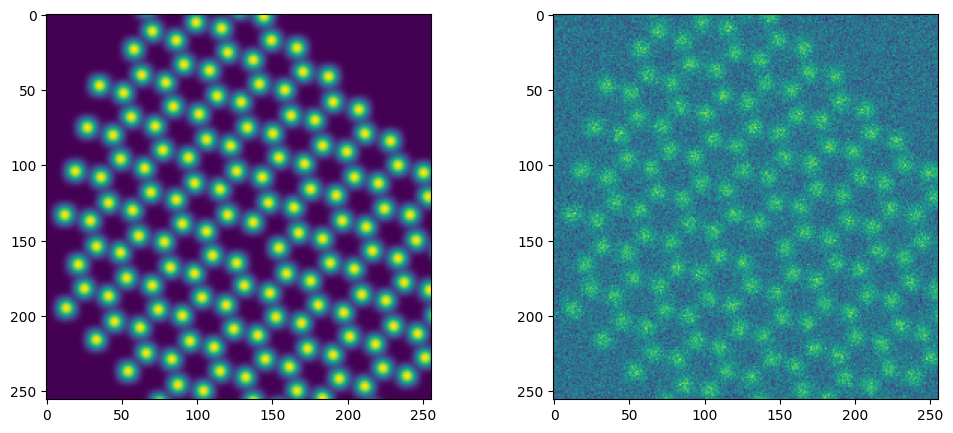

In [21]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].imshow(imgdata[0])
ax[1].imshow(noisy_data[0])

In [25]:
# imgdata[:,None].shape /  np.expand_dims(imgdata,1).shape
# 2가지 방법중 하나로 4차원으로 만들기
# input => (n_samples,n_channels,height,width)로 4D

img_data = np.expand_dims(imgdata,1)
noisy_data = np.expand_dims(noisy_data,1)

print(img_data.shape,noisy_data.shape)

(2016, 1, 256, 256) (2016, 1, 256, 256)


In [27]:
noisy_data_train , noisy_data_test, img_data_train, img_data_test = train_test_split(noisy_data,img_data,test_size=0.2,random_state=42)

In [32]:
print(noisy_data_train.shape,noisy_data_test.shape,'\n',img_data_train.shape,img_data_test.shape)

(1612, 1, 256, 256) (404, 1, 256, 256) 
 (1612, 1, 256, 256) (404, 1, 256, 256)


In [34]:
model = pycroscopy.learn.dl.models.DenoisingAutoEncoder(
    ndim=2,batchnorm=False
)

In [40]:
from torchsummary import summary
summary(model,input_size=(1,256,256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             320
         LeakyReLU-2         [-1, 32, 256, 256]               0
         MaxPool2d-3         [-1, 32, 128, 128]               0
         ConvBlock-4         [-1, 32, 128, 128]               0
            Conv2d-5         [-1, 64, 128, 128]          18,496
         LeakyReLU-6         [-1, 64, 128, 128]               0
            Conv2d-7         [-1, 64, 128, 128]          36,928
         LeakyReLU-8         [-1, 64, 128, 128]               0
         MaxPool2d-9           [-1, 64, 64, 64]               0
        ConvBlock-10           [-1, 64, 64, 64]               0
           Conv2d-11           [-1, 96, 64, 64]          55,392
        LeakyReLU-12           [-1, 96, 64, 64]               0
           Conv2d-13           [-1, 96, 64, 64]          83,040
        LeakyReLU-14           [-1, 96,

In [ ]:
dir(pycroscopy.learn.dl.models)

['AutoEncoder',
 'ConvBlock',
 'DenoisingAutoEncoder',
 'FeatureExtractor',
 'List',
 'Tuple',
 'Union',
 'UpsampleBlock',
 'Upsampler',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'features_to_latent',
 'latent_to_features',
 'nn',
 'np',
 'torch',
 'tt']

In [44]:
# cpu에서 10번만 돌렸다.
trainer = pycroscopy.learn.Trainer(
    model,
    noisy_data_train,img_data_train,noisy_data_test,img_data_test,
    batch_size=32
)
trainer.fit(num_epochs=10)

Epoch: 1... Training loss: 33.4320... Test loss: 14.3391
Epoch: 2... Training loss: 6.3210... Test loss: 3.2169
Epoch: 3... Training loss: 2.1439... Test loss: 1.3949
Epoch: 4... Training loss: 1.3039... Test loss: 1.0018
Epoch: 5... Training loss: 0.9442... Test loss: 0.7642
Epoch: 6... Training loss: 0.7610... Test loss: 0.7703
Epoch: 7... Training loss: 8.8566... Test loss: 30.1351
Epoch: 8... Training loss: 12.5315... Test loss: 2.4798
Epoch: 9... Training loss: 1.5637... Test loss: 1.0976
Epoch: 10... Training loss: 0.9736... Test loss: 0.8807


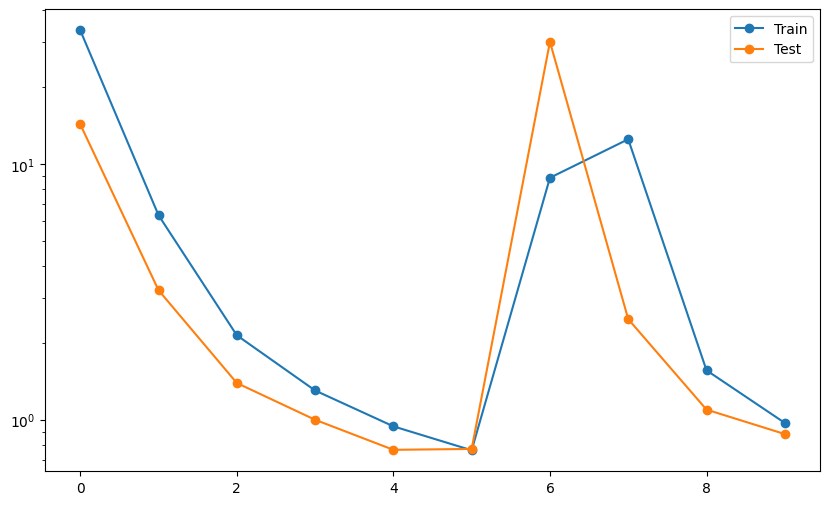

In [45]:
plt.figure(figsize=(10,6))
plt.plot(trainer.train_losses, '-o', label='Train')
plt.plot(trainer.test_losses, '-o', label='Test')
plt.yscale("log")
plt.legend()

In [46]:
pred = model.predict(noisy_data_test)

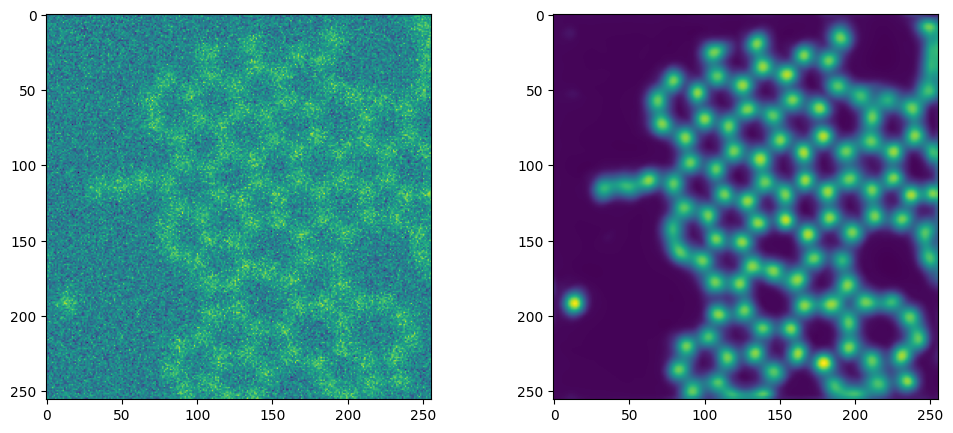

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].imshow(noisy_data_test[0].squeeze()) # 256,256으로 하기 위함
ax[1].imshow(pred[0].squeeze())